<a href="https://colab.research.google.com/github/overred0704/direction_valve_monitor/blob/main/AI%20model%20v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#load data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

In [ ]:
d1 = pd.read_csv('/content/drive/MyDrive/金屬中心/能專/資料/rawdata.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
d1 = d1.drop('Unnamed: 0', axis=1)

In [ ]:
d1

,date,time,掃氣時間(sec),點火穩定時間(sec),換向時間(sec),洩壓閥洩壓壓力(Pa),目標爐壓(Pa),停機爐壓(Pa),目標爐溫(℃),換向閥溫度(℃),換向閥停機溫度(℃),摻冷風溫度(℃),引風機停機溫度(℃),FGR溫度(℃),引風伺服閥開度(),M1伺服閥開度(),M2伺服閥開度(),M3伺服閥開度(),M4伺服閥開度(),持溫時間(),1080烘爐時間(),引風伺服閥開度(%),M1伺服閥開度(%),M2伺服閥開度(%),M3伺服閥開度(%),M4伺服閥開度(%),#2爐壓(Pa),平均爐壓(Pa),#1爐門開關(),#2爐門開關(),1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,2021/04/06,00:00:03,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.81,0.61,0.75,0.68,0.79,0.69,0.54,0.83,0.87
1,2021/04/06,00:00:07,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,82.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
2,2021/04/06,00:00:11,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
3,2021/04/06,00:00:15,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
4,2021/04/06,00:00:19,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.68,0.64,0.68,0.78,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322320,2021/04/24,01:29:10,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322321,2021/04/24,01:29:14,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322322,2021/04/24,01:29:18,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322323,2021/04/24,01:29:22,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,2.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78


In [ ]:
print(d1.loc[(d1['1_air'] == '-')].index)

Int64Index([  65535,   65536,   65537,   65538,   65539,   65540,   65541,
              65542,   65543,   65544,
            ...
            1256780, 1256781, 1256782, 1256783, 1256784, 1256785, 1256786,
            1256787, 1256788, 1256789],
           dtype='int64', length=663645)


In [ ]:
d2 = d1.drop(index=d1.loc[(d1['1_air'] == '-')].index, axis=0)

In [ ]:
d2

,date,time,掃氣時間(sec),點火穩定時間(sec),換向時間(sec),洩壓閥洩壓壓力(Pa),目標爐壓(Pa),停機爐壓(Pa),目標爐溫(℃),換向閥溫度(℃),換向閥停機溫度(℃),摻冷風溫度(℃),引風機停機溫度(℃),FGR溫度(℃),引風伺服閥開度(),M1伺服閥開度(),M2伺服閥開度(),M3伺服閥開度(),M4伺服閥開度(),持溫時間(),1080烘爐時間(),引風伺服閥開度(%),M1伺服閥開度(%),M2伺服閥開度(%),M3伺服閥開度(%),M4伺服閥開度(%),#2爐壓(Pa),平均爐壓(Pa),#1爐門開關(),#2爐門開關(),1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,2021/04/06,00:00:03,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.81,0.61,0.75,0.68,0.79,0.69,0.54,0.83,0.87
1,2021/04/06,00:00:07,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,82.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
2,2021/04/06,00:00:11,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
3,2021/04/06,00:00:15,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
4,2021/04/06,00:00:19,60.0,180.0,30.0,330.0,150.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,38.0,420.0,90.0,80.0,80.0,80.0,80.0,-450.0,300.0,1.0,0,0.61,0.63,0.85,0.71,0.68,0.64,0.68,0.78,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1322320,2021/04/24,01:29:10,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322321,2021/04/24,01:29:14,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322322,2021/04/24,01:29:18,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,1.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
1322323,2021/04/24,01:29:22,60.0,120.0,30.0,330.0,100.0,250.0,1080.0,200.0,250.0,220.0,250.0,800.0,100.0,100.0,100.0,100.0,100.0,12.0,420.0,70.0,80.0,80.0,80.0,80.0,-450.0,2.0,0.0,0,0.56,0.53,0.78,0.7,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78


#some function

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
class Training_plot():
  def __init__(self, history):
    self.history = history
  def acc(self):
    plt.plot(self.history.history['accuracy'])
    plt.plot(self.history.history['val_accuracy'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()
  def loss(self):
    plt.plot(self.history.history['loss'])
    plt.plot(self.history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

#data preprocess

In [ ]:
d3 = d2.iloc[:, 2:30]
list(d3.columns)

['掃氣時間(sec)',
 '點火穩定時間(sec)',
 '換向時間(sec)',
 '洩壓閥洩壓壓力(Pa)',
 '目標爐壓(Pa)',
 '停機爐壓(Pa)',
 '目標爐溫(℃)',
 '換向閥溫度(℃)',
 '換向閥停機溫度(℃)',
 '摻冷風溫度(℃)',
 '引風機停機溫度(℃)',
 'FGR溫度(℃)',
 '引風伺服閥開度()',
 'M1伺服閥開度()',
 'M2伺服閥開度()',
 'M3伺服閥開度()',
 'M4伺服閥開度()',
 '持溫時間()',
 '1080烘爐時間()',
 '引風伺服閥開度(%)',
 'M1伺服閥開度(%)',
 'M2伺服閥開度(%)',
 'M3伺服閥開度(%)',
 'M4伺服閥開度(%)',
 '#2爐壓(Pa)',
 '平均爐壓(Pa)',
 '#1爐門開關()',
 '#2爐門開關()']

In [ ]:
x = d2.iloc[:, 2:30]

In [ ]:
x = x.astype(float)

In [ ]:
y = d2.iloc[:, 30:]

In [ ]:
y = y.astype(float)

###remove outlier

In [ ]:
q3-q1=iqr
lower = q1-1.5*iqr
upper = q3+1.5*iqr

In [ ]:
# Computing IQR
Q1 = y[i].quantile(0.25)
Q3 = y[i].quantile(0.75)
IQR = Q3 - Q1
#upper and power
upper = y[i].mean()+ 1.5*Q3
lower = y[i].mean()- 1.5*Q1

In [ ]:
for i in y.columns:
  # Computing IQR
  Q1 = y[i].quantile(0.25)
  Q3 = y[i].quantile(0.75)
  IQR = Q3 - Q1
  #upper and power
  upper = y[i].mean()+ 1.5*Q3
  lower = y[i].mean()- 1.5*Q1

  mask1 = (y[i] > upper)
  mask2 = (y[i] < lower)

  remove_index = y[(mask1|mask2)].index
  
  x = x.drop(index=list(remove_index))
  y = y.drop(index=list(remove_index))

#feature selection

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
model = DecisionTreeRegressor()

In [ ]:
model.fit(x, y)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
yhat = model.predict(x)

In [ ]:
importance = model.feature_importances_
importance

array([0.    , 0.0106, 0.    , 0.    , 0.0041, 0.    , 0.0141, 0.    ,
       0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.429 , 0.    , 0.017 , 0.0085, 0.023 , 0.0043, 0.0027,
       0.    , 0.4854, 0.0008, 0.0004])

In [ ]:
importances = model.feature_importances_

sorted_indices = np.argsort(importances)[::-1]

sorted_indices

array([25, 17, 21, 19,  6,  1, 20, 22,  4, 23, 26, 27,  7,  2,  5,  3,  9,
        8, 13, 10, 11, 12, 14, 15, 16, 18, 24,  0])

In [ ]:
for i in sorted_indices:
  print(x.columns[i] ,':' ,  importances[i])

平均爐壓(Pa) : 0.4853740565937742
持溫時間() : 0.42895758898946984
M2伺服閥開度(%) : 0.023046216475836507
引風伺服閥開度(%) : 0.016979123477814842
目標爐溫(℃) : 0.014131528916182126
點火穩定時間(sec) : 0.010636966956976836
M1伺服閥開度(%) : 0.008504512453110725
M3伺服閥開度(%) : 0.0043303447368179685
目標爐壓(Pa) : 0.00409513260516691
M4伺服閥開度(%) : 0.0027244551703913423
#1爐門開關() : 0.0008261872039893956
#2爐門開關() : 0.0003938864204694221
換向閥溫度(℃) : 0.0
換向時間(sec) : 0.0
停機爐壓(Pa) : 0.0
洩壓閥洩壓壓力(Pa) : 0.0
摻冷風溫度(℃) : 0.0
換向閥停機溫度(℃) : 0.0
M1伺服閥開度() : 0.0
引風機停機溫度(℃) : 0.0
FGR溫度(℃) : 0.0
引風伺服閥開度() : 0.0
M2伺服閥開度() : 0.0
M3伺服閥開度() : 0.0
M4伺服閥開度() : 0.0
1080烘爐時間() : 0.0
#2爐壓(Pa) : 0.0
掃氣時間(sec) : 0.0


##final selection

In [ ]:
select_col = ['平均爐壓(Pa)',
              '持溫時間()',
              'M2伺服閥開度(%)',
              '引風伺服閥開度(%)',
              '目標爐溫(℃)',
              '點火穩定時間(sec)',
              'M1伺服閥開度(%)',
              'M3伺服閥開度(%)',
              '目標爐壓(Pa)',
              'M4伺服閥開度(%)',
              '#1爐門開關()',
              '#2爐門開關()']

In [ ]:
new_x = x[select_col]

In [ ]:
new_x

,平均爐壓(Pa),持溫時間(),M2伺服閥開度(%),引風伺服閥開度(%),目標爐溫(℃),點火穩定時間(sec),M1伺服閥開度(%),M3伺服閥開度(%),目標爐壓(Pa),M4伺服閥開度(%),#1爐門開關(),#2爐門開關()
0,300.0,38.0,80.0,70.0,1080.0,180.0,80.0,80.0,150.0,80.0,1.0,0.0
1,300.0,38.0,80.0,82.0,1080.0,180.0,80.0,80.0,150.0,80.0,1.0,0.0
2,300.0,38.0,80.0,90.0,1080.0,180.0,80.0,80.0,150.0,80.0,1.0,0.0
3,300.0,38.0,80.0,90.0,1080.0,180.0,80.0,80.0,150.0,80.0,1.0,0.0
4,300.0,38.0,80.0,90.0,1080.0,180.0,80.0,80.0,150.0,80.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1322320,1.0,12.0,80.0,70.0,1080.0,120.0,80.0,80.0,100.0,80.0,0.0,0.0
1322321,1.0,12.0,80.0,70.0,1080.0,120.0,80.0,80.0,100.0,80.0,0.0,0.0
1322322,1.0,12.0,80.0,70.0,1080.0,120.0,80.0,80.0,100.0,80.0,0.0,0.0
1322323,2.0,12.0,80.0,70.0,1080.0,120.0,80.0,80.0,100.0,80.0,0.0,0.0


#model

##data normalize

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler1=MinMaxScaler()

In [ ]:
nm_x = scaler1.fit_transform(new_x)

In [ ]:
nm_x

array([[1.    , 0.0107, 0.8   , ..., 0.8   , 1.    , 0.    ],
       [1.    , 0.0107, 0.8   , ..., 0.8   , 1.    , 0.    ],
       [1.    , 0.0107, 0.8   , ..., 0.8   , 1.    , 0.    ],
       ...,
       [0.5138, 0.002 , 0.8   , ..., 0.8   , 0.    , 0.    ],
       [0.5154, 0.002 , 0.8   , ..., 0.8   , 0.    , 0.    ],
       [0.5138, 0.002 , 0.8   , ..., 0.8   , 0.    , 0.    ]])

In [ ]:
scaler2=MinMaxScaler()
nm_y = scaler2.fit_transform(y)
nm_y

array([[0.8714, 0.7975, 0.8019, ..., 0.6067, 0.0073, 0.8447],
       [0.8714, 0.7975, 0.8019, ..., 0.6067, 0.0073, 0.8447],
       [0.8714, 0.7975, 0.8019, ..., 0.6067, 0.0073, 0.8447],
       ...,
       [0.8   , 0.6709, 0.7358, ..., 0.5955, 0.0059, 0.7573],
       [0.8   , 0.6709, 0.7358, ..., 0.5955, 0.0059, 0.7573],
       [0.8   , 0.6709, 0.7358, ..., 0.5955, 0.0059, 0.7573]])

In [ ]:
qq = scaler2.inverse_transform(nm_y)
qq

array([[0.61, 0.63, 0.85, ..., 0.54, 0.83, 0.87],
       [0.61, 0.63, 0.85, ..., 0.54, 0.83, 0.87],
       [0.61, 0.63, 0.85, ..., 0.54, 0.83, 0.87],
       ...,
       [0.56, 0.53, 0.78, ..., 0.53, 0.67, 0.78],
       [0.56, 0.53, 0.78, ..., 0.53, 0.67, 0.78],
       [0.56, 0.53, 0.78, ..., 0.53, 0.67, 0.78]])

##model building


In [ ]:
from tensorflow.keras import Sequential, utils
from tensorflow.keras.layers import Flatten, Dense, Conv1D, MaxPool1D, Dropout, MaxPooling1D, BatchNormalization
from keras import backend as K

In [ ]:
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [ ]:
def create_model():
  model = Sequential()
  model.add(Dense(50, activation='relu', input_shape=(nm_x.shape[1] , )))

  model.add(Dense(30, activation='relu'))

  model.add(Dropout(0.25))
  #model.add(BatchNormalization())
  model.add(Dense(20, activation='relu'))
  model.add(Dense(18, activation='linear'))
  model.compile(optimizer='adam', loss = root_mean_squared_error)
  return model

In [ ]:
m1 = create_model()

In [ ]:
m1.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_44 (Dense)             (None, 50)                650       
_________________________________________________________________
dense_45 (Dense)             (None, 30)                1530      
_________________________________________________________________
dropout_11 (Dropout)         (None, 30)                0         
_________________________________________________________________
dense_46 (Dense)             (None, 20)                620       
_________________________________________________________________
dense_47 (Dense)             (None, 18)                378       
Total params: 3,178
Trainable params: 3,178
Non-trainable params: 0
_________________________________________________________________


##model training

In [ ]:
history = m1.fit(nm_x, nm_y, epochs=20, batch_size=128, validation_split=0.1)

Epoch 1/20
4597/4597 [==============================] - 9s 2ms/step - loss: 0.0720 - val_loss: 0.0228
Epoch 2/20
4597/4597 [==============================] - 9s 2ms/step - loss: 0.0593 - val_loss: 0.0167
Epoch 3/20
4597/4597 [==============================] - 9s 2ms/step - loss: 0.0587 - val_loss: 0.0187
Epoch 4/20
4597/4597 [==============================] - 9s 2ms/step - loss: 0.0587 - val_loss: 0.0201
Epoch 5/20
4597/4597 [==============================] - 8s 2ms/step - loss: 0.0584 - val_loss: 0.0244
Epoch 6/20
4597/4597 [==============================] - 9s 2ms/step - loss: 0.0581 - val_loss: 0.0197
Epoch 7/20
4597/4597 [==============================] - 8s 2ms/step - loss: 0.0581 - val_loss: 0.0232
Epoch 8/20
4597/4597 [==============================] - 9s 2ms/step - loss: 0.0580 - val_loss: 0.0204
Epoch 9/20
4597/4597 [==============================] - 9s 2ms/step - loss: 0.0582 - val_loss: 0.0183
Epoch 10/20
4597/4597 [==============================] - 9s 2ms/step - loss: 0.058

In [ ]:
m1.save('model_0825.h5')

In [ ]:
m1.evaluate(nm_x, nm_y, batch_size=128)

5107/5107 [==============================] - 6s 1ms/step - loss: 0.0302


0.030156461521983147

##model inference

In [ ]:
his = Training_plot(history)

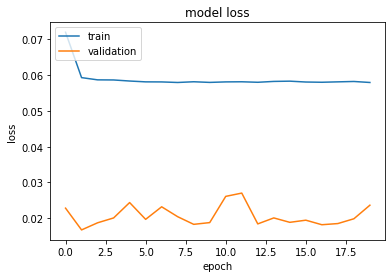

In [ ]:
his.loss()

In [ ]:
yhat = m1.predict(nm_x)

In [ ]:
yhat[0]

array([0.8503, 0.8106, 0.7951, 0.8398, 0.6909, 0.7427, 0.9026, 0.9255,
       0.8103, 0.8707, 0.665 , 0.7078, 0.7604, 0.8227, 0.6734, 0.6204,
       0.0069, 0.8312], dtype=float32)

In [ ]:
y

,index,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.81,0.61,0.75,0.68,0.79,0.69,0.54,0.83,0.87
1,1,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
2,2,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
3,3,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
4,4,0.61,0.63,0.85,0.71,0.68,0.64,0.68,0.78,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658675,1322320,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
658676,1322321,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
658677,1322322,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
658678,1322323,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78


In [ ]:
yhat

array([[0.8503, 0.8106, 0.7951, ..., 0.6204, 0.0069, 0.8312],
       [0.8526, 0.8077, 0.7989, ..., 0.6208, 0.0069, 0.8308],
       [0.853 , 0.8071, 0.7994, ..., 0.6206, 0.0068, 0.8307],
       ...,
       [0.8123, 0.7149, 0.7423, ..., 0.6125, 0.0072, 0.7707],
       [0.8124, 0.715 , 0.7423, ..., 0.6125, 0.0072, 0.7707],
       [0.8123, 0.7149, 0.7423, ..., 0.6125, 0.0072, 0.7707]],
      dtype=float32)

#calculate error

##yhat-ytrue = error

In [ ]:
#reverse yhat
yhat_rev = scaler2.inverse_transform(yhat)

In [ ]:
yhat_rev

array([[0.5952, 0.6403, 0.8428, ..., 0.5521, 0.7839, 0.8561],
       [0.5968, 0.6381, 0.8468, ..., 0.5525, 0.7817, 0.8557],
       [0.5971, 0.6376, 0.8474, ..., 0.5523, 0.7803, 0.8556],
       ...,
       [0.5686, 0.5648, 0.7868, ..., 0.5451, 0.8153, 0.7938],
       [0.5687, 0.5649, 0.7868, ..., 0.5452, 0.8155, 0.7939],
       [0.5686, 0.5648, 0.7868, ..., 0.5451, 0.8153, 0.7938]],
      dtype=float32)

In [ ]:
error = abs(yhat_rev - y)

In [ ]:
error

,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,0.014812,0.010345,0.007156,0.004562,0.012201,0.001237,0.003037,0.003308,0.022816,0.000262,0.004808,0.006805,0.034805,0.040889,0.023836,0.012134,0.046065,0.013880
1,0.013200,0.008066,0.003201,0.004117,0.010612,0.000937,0.002639,0.002721,0.023199,0.028103,0.025669,0.007246,0.036050,0.041023,0.025511,0.012482,0.048303,0.014324
2,0.012924,0.007616,0.002605,0.004021,0.010316,0.000835,0.002511,0.002539,0.023181,0.027790,0.026091,0.007197,0.036084,0.040820,0.025403,0.012316,0.049657,0.014426
3,0.012924,0.007616,0.002605,0.004021,0.010316,0.000835,0.002511,0.002539,0.023181,0.027790,0.026091,0.007197,0.036084,0.040820,0.025403,0.012316,0.049657,0.014426
4,0.012924,0.007616,0.002605,0.004021,0.019684,0.000835,0.002511,0.007461,0.023181,0.027790,0.026091,0.007197,0.036084,0.040820,0.025403,0.012316,0.049657,0.014426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658675,0.008627,0.034810,0.006786,0.015254,0.003658,0.009189,0.021854,0.035329,0.007780,0.006888,0.001308,0.017245,0.011404,0.010004,0.027512,0.015146,0.145295,0.013836
658676,0.008627,0.034810,0.006786,0.015254,0.003658,0.009189,0.021854,0.035329,0.007780,0.006888,0.001308,0.017245,0.011404,0.010004,0.027512,0.015146,0.145295,0.013836
658677,0.008627,0.034810,0.006786,0.015254,0.003658,0.009189,0.021854,0.035329,0.007780,0.006888,0.001308,0.017245,0.011404,0.010004,0.027512,0.015146,0.145295,0.013836
658678,0.008663,0.034877,0.006850,0.015262,0.003694,0.009210,0.021890,0.035387,0.007783,0.006888,0.001338,0.017267,0.011426,0.010033,0.027531,0.015167,0.145542,0.013856


In [ ]:
des = error.describe()

In [ ]:
des

,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
count,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05,6.536590e+05
mean,2.061269e-02,3.343111e-02,2.255191e-02,1.453580e-02,2.181548e-02,1.618632e-02,1.640679e-02,1.856035e-02,2.069758e-02,2.286811e-02,1.685315e-02,1.848087e-02,2.308356e-02,2.416883e-02,2.641744e-02,2.000082e-02,8.936073e-02,3.595280e-02
std,4.500298e-02,4.927206e-02,5.647353e-02,4.990837e-02,5.115173e-02,4.699535e-02,5.018977e-02,5.595545e-02,4.473596e-02,6.023157e-02,3.973260e-02,5.572496e-02,5.818694e-02,6.623559e-02,5.397697e-02,4.102939e-02,9.455908e-01,6.280543e-02
min,5.245209e-08,1.454353e-07,6.675720e-08,8.106232e-08,3.814697e-08,1.430511e-08,7.152557e-09,2.145767e-08,5.102158e-07,1.072884e-07,3.337860e-08,6.914139e-08,2.861023e-08,2.384186e-08,7.152557e-08,7.152557e-08,4.506111e-07,7.390976e-08
25%,8.583479e-03,1.431383e-02,7.020090e-03,5.181980e-03,6.981821e-03,7.730966e-03,6.232934e-03,7.210534e-03,7.777331e-03,6.887696e-03,1.694245e-03,5.838881e-03,9.816457e-03,8.437724e-03,1.039253e-02,7.370076e-03,2.744384e-02,1.095012e-02
50%,1.603131e-02,2.573562e-02,1.298425e-02,1.094750e-02,1.552391e-02,1.039776e-02,1.176985e-02,1.103678e-02,1.484725e-02,1.635908e-02,7.173979e-03,1.430186e-02,1.459052e-02,1.431539e-02,1.834202e-02,1.402614e-02,5.268248e-02,1.795105e-02
75%,2.312822e-02,3.907668e-02,2.673256e-02,1.527007e-02,2.494225e-02,1.728704e-02,1.762236e-02,2.031724e-02,2.313601e-02,2.492049e-02,1.918981e-02,1.888091e-02,2.422837e-02,2.990268e-02,2.991092e-02,2.335718e-02,1.444499e-01,4.233897e-02
max,5.939687e-01,6.185123e-01,8.321918e-01,7.060547e-01,6.984135e-01,6.412032e-01,6.809931e-01,7.784340e-01,5.728819e-01,8.172543e-01,6.578388e-01,7.453386e-01,7.657716e-01,8.900973e-01,7.074906e-01,5.558845e-01,1.132364e+02,7.924718e-01


In [ ]:
error1 = error.copy()

In [ ]:
error1 = error1.reset_index()

In [ ]:
error1 = error1.drop('index', axis=1)

##remove outlier

In [ ]:
l1 = []

In [ ]:
for i in error1.columns:
  down = des[i][1] - (des[i][2] * 3)
  up = des[i][1] + (des[i][2] * 3)

  f1 = (error1[i] > up)
  f2 = (error1[i] < down)

  error1.drop(error1[f1|f2].index, inplace=True)
  for j in list(error1[f1|f2].index.values):
    l1.append(j)
    
  print(i, 'is done!')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


1_air is done!
1_smoke is done!
2_air is done!
2_smoke is done!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


3_air is done!
3_smoke is done!
4_air is done!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


4_smoke is done!
5_air is done!
5_smoke is done!
6_air is done!
6_smoke is done!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


7_air is done!
7_smoke is done!
8_air is done!
8_smoke is done!
9_air is done!
9_smoke is done!


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [ ]:
error1

,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,0.014812,0.010345,0.007156,0.004562,0.012201,0.001237,0.003037,0.003308,0.022816,0.000262,0.004808,0.006805,0.034805,0.040889,0.023836,0.012134,0.046065,0.013880
1,0.013200,0.008066,0.003201,0.004117,0.010612,0.000937,0.002639,0.002721,0.023199,0.028103,0.025669,0.007246,0.036050,0.041023,0.025511,0.012482,0.048303,0.014324
2,0.012924,0.007616,0.002605,0.004021,0.010316,0.000835,0.002511,0.002539,0.023181,0.027790,0.026091,0.007197,0.036084,0.040820,0.025403,0.012316,0.049657,0.014426
3,0.012924,0.007616,0.002605,0.004021,0.010316,0.000835,0.002511,0.002539,0.023181,0.027790,0.026091,0.007197,0.036084,0.040820,0.025403,0.012316,0.049657,0.014426
4,0.012924,0.007616,0.002605,0.004021,0.019684,0.000835,0.002511,0.007461,0.023181,0.027790,0.026091,0.007197,0.036084,0.040820,0.025403,0.012316,0.049657,0.014426
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
653654,0.008627,0.034810,0.006786,0.015254,0.003658,0.009189,0.021854,0.035329,0.007780,0.006888,0.001308,0.017245,0.011404,0.010004,0.027512,0.015146,0.145295,0.013836
653655,0.008627,0.034810,0.006786,0.015254,0.003658,0.009189,0.021854,0.035329,0.007780,0.006888,0.001308,0.017245,0.011404,0.010004,0.027512,0.015146,0.145295,0.013836
653656,0.008627,0.034810,0.006786,0.015254,0.003658,0.009189,0.021854,0.035329,0.007780,0.006888,0.001308,0.017245,0.011404,0.010004,0.027512,0.015146,0.145295,0.013836
653657,0.008663,0.034877,0.006850,0.015262,0.003694,0.009210,0.021890,0.035387,0.007783,0.006888,0.001338,0.017267,0.011426,0.010033,0.027531,0.015167,0.145542,0.013856


In [ ]:
error1.to_csv('/content/drive/MyDrive/金屬中心/能專/資料/0825/error_0825.csv')

##plot error curve

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

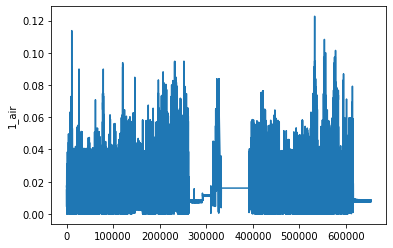

In [ ]:
sns.lineplot(data=error1.iloc[:, 0:1], x=error1.index, y="1_air")

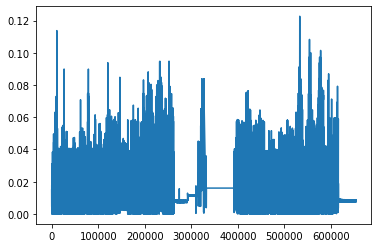

In [ ]:
error1['1_air'].plot()

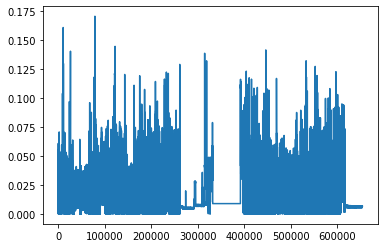

In [ ]:
error1['2_air'].plot()

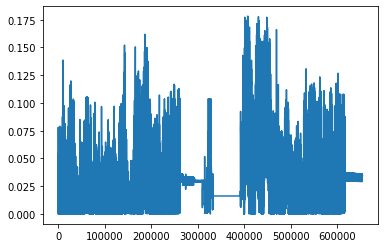

In [ ]:
error1['1_smoke'].plot()

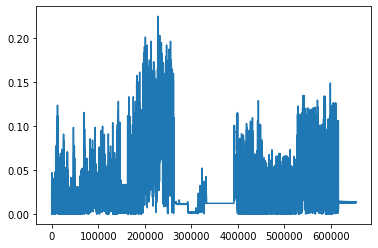

In [ ]:
error1['9_smoke'].plot()

###plot real and prediction

In [ ]:
error = abs(yhat_rev - y)

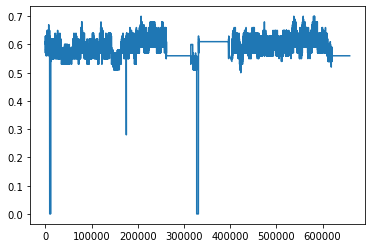

In [ ]:
y['1_air'].plot()

In [ ]:
y.to_csv('/content/drive/MyDrive/金屬中心/能專/資料/0825/real_0825.csv')

In [ ]:
y_df = pd.DataFrame(data=yhat_rev, columns=y.columns)

In [ ]:
y_df.to_csv('/content/drive/MyDrive/金屬中心/能專/資料/0825/predict_0825.csv')

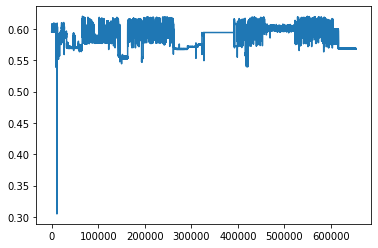

In [ ]:
y_df['1_air'].plot()

In [ ]:
y

,index,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,0,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.81,0.61,0.75,0.68,0.79,0.69,0.54,0.83,0.87
1,1,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
2,2,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
3,3,0.61,0.63,0.85,0.71,0.71,0.64,0.68,0.79,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
4,4,0.61,0.63,0.85,0.71,0.68,0.64,0.68,0.78,0.59,0.78,0.58,0.75,0.68,0.79,0.69,0.54,0.83,0.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658675,1322320,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
658676,1322321,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
658677,1322322,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78
658678,1322323,0.56,0.53,0.78,0.70,0.67,0.62,0.66,0.75,0.56,0.79,0.58,0.75,0.77,0.87,0.69,0.53,0.67,0.78


In [ ]:
y_df

,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
0,0.569122,0.609471,0.800395,0.699188,0.684279,0.630038,0.669922,0.775570,0.564083,0.802996,0.606824,0.749697,0.718758,0.828618,0.695705,0.539366,0.728448,2.345747
1,0.569857,0.611158,0.801574,0.699388,0.684936,0.630350,0.670254,0.775937,0.564037,0.803243,0.606819,0.749328,0.718645,0.828588,0.696371,0.539730,0.731261,2.384383
2,0.570954,0.613711,0.803463,0.699730,0.685857,0.630799,0.670678,0.776403,0.563919,0.803630,0.606599,0.748725,0.718595,0.828686,0.697665,0.540400,0.735398,2.447307
3,0.570954,0.613711,0.803463,0.699730,0.685857,0.630799,0.670678,0.776403,0.563919,0.803630,0.606599,0.748725,0.718595,0.828686,0.697665,0.540400,0.735398,2.447307
4,0.570954,0.613711,0.803463,0.699730,0.685857,0.630799,0.670678,0.776403,0.563919,0.803630,0.606599,0.748725,0.718595,0.828686,0.697665,0.540400,0.735398,2.447307
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
658675,0.566478,0.533799,0.791947,0.693973,0.680574,0.624596,0.671485,0.767868,0.552424,0.784340,0.591582,0.750502,0.749110,0.847278,0.669565,0.533946,0.685462,9.940082
658676,0.566478,0.533799,0.791947,0.693973,0.680574,0.624596,0.671485,0.767868,0.552424,0.784340,0.591582,0.750502,0.749110,0.847278,0.669565,0.533946,0.685462,9.940082
658677,0.566478,0.533799,0.791947,0.693973,0.680574,0.624596,0.671485,0.767868,0.552424,0.784340,0.591582,0.750502,0.749110,0.847278,0.669565,0.533946,0.685462,9.940082
658678,0.566589,0.534115,0.792122,0.694028,0.680669,0.624645,0.671519,0.767955,0.552467,0.784396,0.591717,0.750532,0.748928,0.847127,0.669488,0.533974,0.685958,9.980490


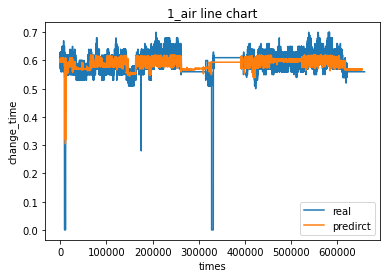

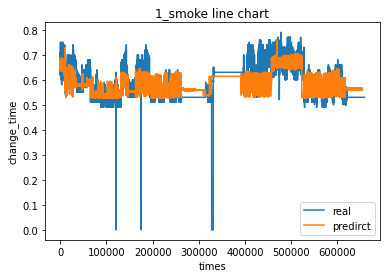

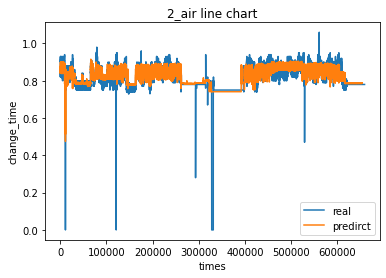

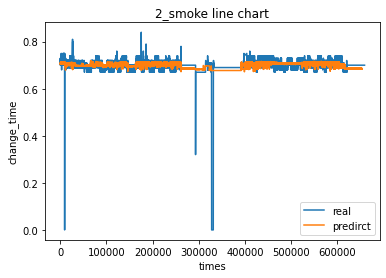

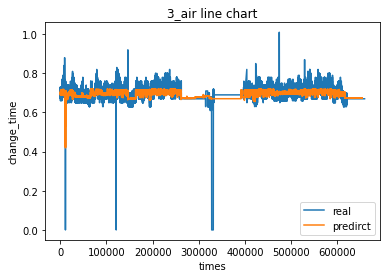

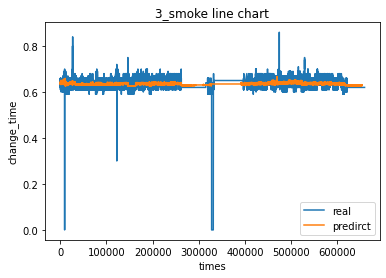

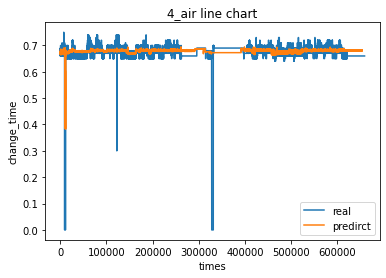

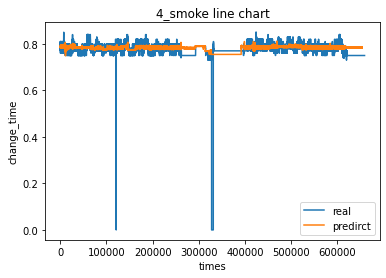

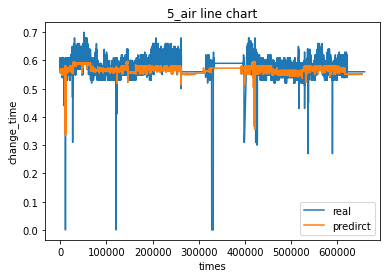

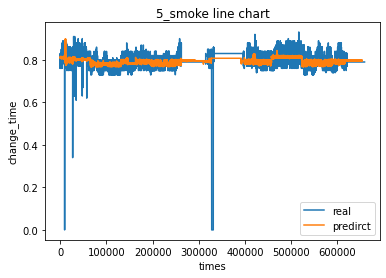

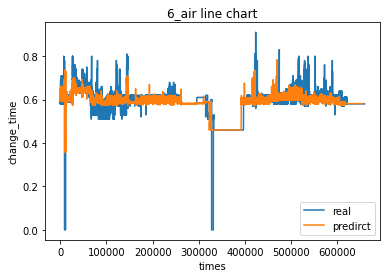

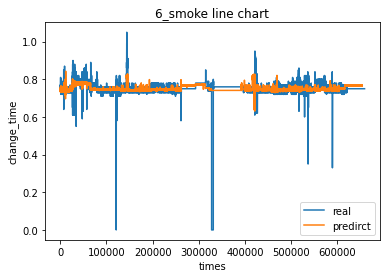

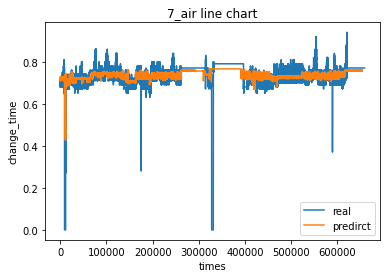

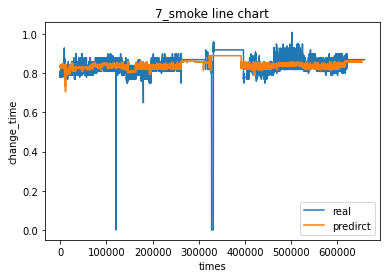

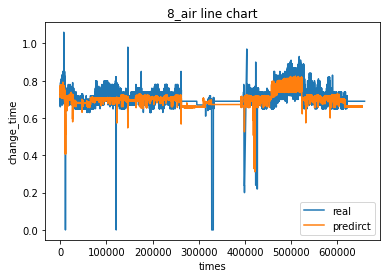

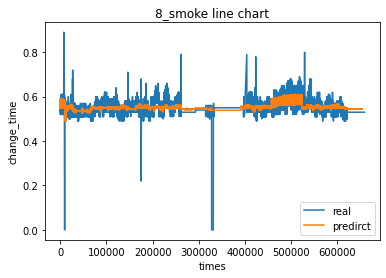

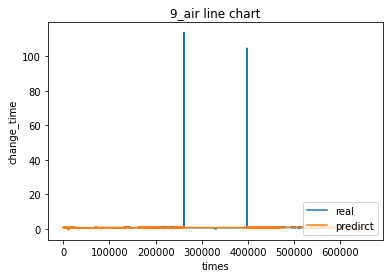

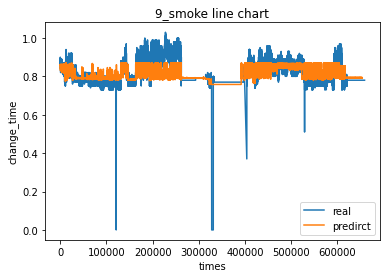

In [ ]:
for i in y_df.columns:
  plt.plot(y[i])
  plt.plot(y_df[i])
  plt.title(i + ' line chart')
  plt.xlabel('times')
  plt.ylabel('change_time')
  plt.legend(['real', 'predirct'], loc='lower right')
  plt.show()

#build up and down limitation

In [ ]:
error1.describe()

,1_air,1_smoke,2_air,2_smoke,3_air,3_smoke,4_air,4_smoke,5_air,5_smoke,6_air,6_smoke,7_air,7_smoke,8_air,8_smoke,9_air,9_smoke
count,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05,6.459610e+05
mean,1.729606e-02,3.012487e-02,1.826342e-02,1.075627e-02,1.801089e-02,1.268619e-02,1.262548e-02,1.446068e-02,1.710546e-02,1.843739e-02,1.371203e-02,1.420736e-02,1.847806e-02,1.910062e-02,2.191996e-02,1.704071e-02,7.765614e-02,3.191006e-02
std,1.283942e-02,2.350118e-02,1.576532e-02,7.016082e-03,1.501996e-02,8.749935e-03,8.435258e-03,1.090153e-02,1.361602e-02,1.445078e-02,1.884651e-02,1.186688e-02,1.445839e-02,1.444551e-02,1.531478e-02,1.339409e-02,6.480293e-02,3.242970e-02
min,5.245209e-08,1.454353e-07,6.675720e-08,8.106232e-08,3.814697e-08,1.430511e-08,7.152557e-09,2.145767e-08,5.102158e-07,1.072884e-07,3.337860e-08,6.914139e-08,2.861023e-08,2.384186e-08,7.152557e-08,7.152557e-08,4.506111e-07,7.390976e-08
25%,8.554163e-03,1.415401e-02,6.984026e-03,5.138001e-03,6.840022e-03,7.648482e-03,6.074123e-03,7.159443e-03,7.740202e-03,6.887696e-03,1.694245e-03,5.823970e-03,9.677210e-03,8.320546e-03,1.029706e-02,7.370076e-03,2.739264e-02,1.095012e-02
50%,1.602178e-02,2.541815e-02,1.280734e-02,1.087222e-02,1.520360e-02,1.034805e-02,1.171132e-02,1.093225e-02,1.467521e-02,1.619223e-02,7.036314e-03,1.425386e-02,1.459052e-02,1.420799e-02,1.815104e-02,1.400980e-02,5.226378e-02,1.769280e-02
75%,2.299044e-02,3.844000e-02,2.628169e-02,1.526208e-02,2.449635e-02,1.706487e-02,1.749809e-02,2.019590e-02,2.284077e-02,2.471191e-02,1.779722e-02,1.888091e-02,2.422837e-02,2.990268e-02,2.980149e-02,2.308759e-02,1.423491e-01,4.157960e-02
max,1.227073e-01,1.781404e-01,1.706585e-01,1.380950e-01,1.673466e-01,1.547859e-01,1.390272e-01,7.356611e-02,1.514944e-01,1.855302e-01,1.360494e-01,1.845583e-01,1.915191e-01,1.973938e-01,1.838471e-01,1.308973e-01,6.891828e-01,2.243027e-01


0         0.014812
1         0.013200
2         0.012924
3         0.012924
4         0.012924
            ...   
653654    0.008627
653655    0.008627
653656    0.008627
653657    0.008663
653658    0.008627
Name: 1_air, Length: 645961, dtype: float64

In [ ]:
d4 = error1.describe()

In [ ]:
for i in error1.columns:
  print(i,'warning value')
  print(d4[i][1] + (d4[i][2]*3))
  print('--------------------')

1_air warning value
0.055814314166295544
--------------------
1_smoke warning value
0.10062842474716778
--------------------
2_air warning value
0.06555937215359212
--------------------
2_smoke warning value
0.03180451521212056
--------------------
3_air warning value
0.0630707700764968
--------------------
3_smoke warning value
0.038935993721461275
--------------------
4_air warning value
0.037931256849179126
--------------------
4_smoke warning value
0.047165282621650255
--------------------
5_air warning value
0.0579535080858862
--------------------
5_smoke warning value
0.0617897220154721
--------------------
6_air warning value
0.07025156502527549
--------------------
6_smoke warning value
0.04980799086436538
--------------------
7_air warning value
0.06185323166864276
--------------------
7_smoke warning value
0.0624371529149162
--------------------
8_air warning value
0.0678642978239352
--------------------
8_smoke warning value
0.057222973681918185
--------------------
9_air wa

In [ ]:
for i in error1.columns:
  print(i,'stop value')
  print(d4[i][1] + (d4[i][2]*4))
  print('--------------------')

1_air stop value
0.06865373091052654
--------------------
1_smoke stop value
0.12412960933121443
--------------------
2_air stop value
0.08132468796859844
--------------------
2_smoke stop value
0.0388205973035723
--------------------
3_air stop value
0.07809073063419125
--------------------
3_smoke stop value
0.047685928980029775
--------------------
4_air stop value
0.046366515294407495
--------------------
4_smoke stop value
0.05806681644530538
--------------------
5_air stop value
0.0715695240778568
--------------------
5_smoke stop value
0.07624049997605276
--------------------
6_air stop value
0.08909807542920568
--------------------
6_smoke stop value
0.061674868649301065
--------------------
7_air stop value
0.07631162343613063
--------------------
7_smoke stop value
0.0768826640688666
--------------------
8_air stop value
0.08317907786629998
--------------------
8_smoke stop value
0.070617060456833
--------------------
9_air stop value
0.33686784599831066
--------------------
